In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t
from sklearn.decomposition import PCA, IncrementalPCA, TruncatedSVD

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Lets try out some stuff on a super small dataframe

In [3]:
# intialise data of lists. 
data = {'Name':['Tom', 'nick', 'krish', 'jack'], 'Age':[20, 21, 19, 18], 'Sex':['M', 'M', 'F', 'M']} 
  
# Create DataFrame 
df_sample = pd.DataFrame(data) 
  
# Print the output. 
df_sample

,Name,Age,Sex
0,Tom,20,M
1,nick,21,M
2,krish,19,F
3,jack,18,M


In [4]:
# Get dummies
df_sample_dummies = pd.get_dummies(df_sample, prefix_sep='_', drop_first=True)

# X head
print(df_sample_dummies)

   Age  Name_jack  Name_krish  Name_nick  Sex_M
0   20          0           0          0      1
1   21          0           0          1      1
2   19          0           1          0      0
3   18          1           0          0      1


In [5]:
# Get sparse dummies
df_sample_sparse_dummies = pd.get_dummies(df_sample, prefix_sep='_', drop_first=True, sparse=True)

# X head
print(df_sample_sparse_dummies)

   Age  Name_jack  Name_krish  Name_nick  Sex_M
0   20          0           0          0      1
1   21          0           0          1      1
2   19          0           1          0      0
3   18          1           0          0      1


In [6]:
df_sample_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
Age           4 non-null int64
Name_jack     4 non-null uint8
Name_krish    4 non-null uint8
Name_nick     4 non-null uint8
Sex_M         4 non-null uint8
dtypes: int64(1), uint8(4)
memory usage: 128.0 bytes


In [7]:
df_sample_sparse_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
Age           -4 non-null int64
Name_jack     -4 non-null Sparse[uint8, 0]
Name_krish    -4 non-null Sparse[uint8, 0]
Name_nick     -4 non-null Sparse[uint8, 0]
Sex_M         -4 non-null Sparse[uint8, 0]
dtypes: Sparse[uint8, 0](4), int64(1)
memory usage: 142.0 bytes


In [8]:
pca = PCA()
y_pca = pca.fit_transform(df_sample_sparse_dummies)

In [9]:
plt.scatter(y_pca)

TypeError: scatter() missing 1 required positional argument: 'y'

# Let's try it on the big dataset

In [10]:
df = pd.read_csv('Data/Loan_Storied.csv',low_memory=False,index_col=0, 
                parse_dates=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 
                               'debt_settlement_flag_date', 'settlement_date'])

C:\Users\Scott\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [11]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,meets_credit_policy
0,5000.000,5000.000,4975.000,36.000,0.106,162.870,B,B2,NaN,10.000,RENT,24000.000,Verified,2011-12-01,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0.000,1985-01-01,1.000,nan,nan,3.000,0.000,13648.000,0.837,9.000,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,2015-01-01,171.620,NaT,2019-05-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan,True
1,2500.000,2500.000,2500.000,60.000,0.153,59.830,C,C4,Ryder,0.500,RENT,30000.000,Source Verified,2011-12-01,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0.000,1999-04-01,5.000,nan,nan,3.000,0.000,1687.000,0.094,4.000,f,0.000,0.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,2013-04-01,119.660,NaT,2016-10-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan,True
2,2400.000,2400.000,2400.000,36.000,0.160,84.330,C,C5,NaN,10.000,RENT,12252.000,Not Verified,2011-12-01,Fully Paid,n,NaN,small_business,real estate business,606xx,

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422722 entries, 0 to 1422721
Columns: 142 entries, loan_amnt to meets_credit_policy
dtypes: bool(1), datetime64[ns](7), float64(108), object(26)
memory usage: 1.5+ GB


In [13]:
df.dtypes

loan_amnt                                            float64
funded_amnt                                          float64
funded_amnt_inv                                      float64
term_months                                          float64
int_rate_pct                                         float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length_years                                     float64
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status                                           object
pymnt_plan                                            object
desc                    

There are 26 object columns

We need to get rid of columns that contain information that happens after a loan has been given out, such as hardships.  This is really an important step and it also helps us downsize our dataset a little bit.  

In [14]:
drop_list = ['collection_recovery_fee', 'debt_settlement_flag','debt_settlement_flag_date','deferral_term','delinq_amnt','hardship_amount','hardship_dpd', 'hardship_end_date', 'hardship_flag','hardship_last_payment_amount','hardship_length', 'hardship_loan_status','hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'last_pymnt_amnt','last_pymnt_d','next_pymnt_d','orig_projected_additional_accrued_interest','out_prncp','out_prncp_inv','payment_plan_start_date','pymnt_plan','recoveries','settlement_amount','settlement_date','settlement_percentage','settlement_status','settlement_term','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','loan_status','desc',]
df_y = df.drop(drop_list, axis=1)
df_y.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,meets_credit_policy
0,5000.000,5000.000,4975.000,36.000,0.106,162.870,B,B2,NaN,10.000,RENT,24000.000,Verified,2011-12-01,credit_card,Computer,860xx,AZ,27.650,0.000,1985-01-01,1.000,nan,nan,3.000,0.000,13648.000,0.837,9.000,f,2019-05-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,True
1,2500.000,2500.000,2500.000,60.000,0.153,59.830,C,C4,Ryder,0.500,RENT,30000.000,Source Verified,2011-12-01,car,bike,309xx,GA,1.000,0.000,1999-04-01,5.000,nan,nan,3.000,0.000,1687.000,0.094,4.000,f,2016-10-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,True
2,2400.000,2400.000,2400.000,36.000,0.160,84.330,C,C5,NaN,10.000,RENT,12252.000,Not Verified,2011-12-01,small_business,real estate business,606xx,IL,8.720,0.000,2001-11-01,2.000,nan,nan,2.000,0.000,2956.000,0.985,10.000,f,2017-06-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,True
3,10000.000,10000.000,10000.000,36.000,0.135,339.310,C,C1,AIR RESOURCES BOARD,10.000,RENT,49200.000,Source Verified,2011-12-01,other,personel,917xx,CA,20.000,0.000,1996-02-01,1.000,35.000,nan,10.000,0.000,5598.000,0.210,37.000,f,2016-04-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,True
4,3000.000,3000.000,3000.000,60.000,0.127,67.790,B,B5,University Medical Group,1.000,RENT,80000.000,Source Verified,2011-12-01,other,Personal,972xx,OR,17.940,0.000,1996-01-01,0.000,38.000,nan,15.000,0.000,2

In [15]:
obj_list = sorted(list(df_y.select_dtypes(include=['object']).columns))
for i in range(len(obj_list)):
    print(obj_list[i])
    print(len(df_y[obj_list[i]].unique()))
    print(df_y[obj_list[i]].unique())

addr_state
51
['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME' 'ND']
application_type
2
['Individual' 'Joint App']
emp_title
391970
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'RSR DRIVER'
 'Disability Employee Program Manager' 'Oncology Medical Assistant']
grade
7
['B' 'C' 'A' 'E' 'F' 'D' 'G']
home_ownership
6
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
initial_list_status
2
['f' 'w']
purpose
14
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
sec_app_earliest_cr_line
584
[nan 'Jan-1999' 'Feb-1984' 'Oct-2012' 'Nov-2004' 'Sep-1999' 'Jun-2002'
 'Dec-2005' 'Jan-1990' 'Mar-1993' 'Sep-2000' 'Aug-2006' 'Apr-1999'
 'Aug-2009' 'Oct-2001' 'Nov-1996' 'Jan-2008

### Wow, did I see that right?  Employee title has 391,970 unique values.  

In [16]:
len(df_y[obj_list[2]].unique())

391970

# Employee title is going to make this really big when we do get_dummies and I am not sure it is adding much value
After around 90,000 values, the next 300,000 are all unique to a single borrower.  Does that add value?  I would move them all into Other but then that category would dominate the analysis.  I guess we will break it down "as is" and lean on PCA to help us out.  

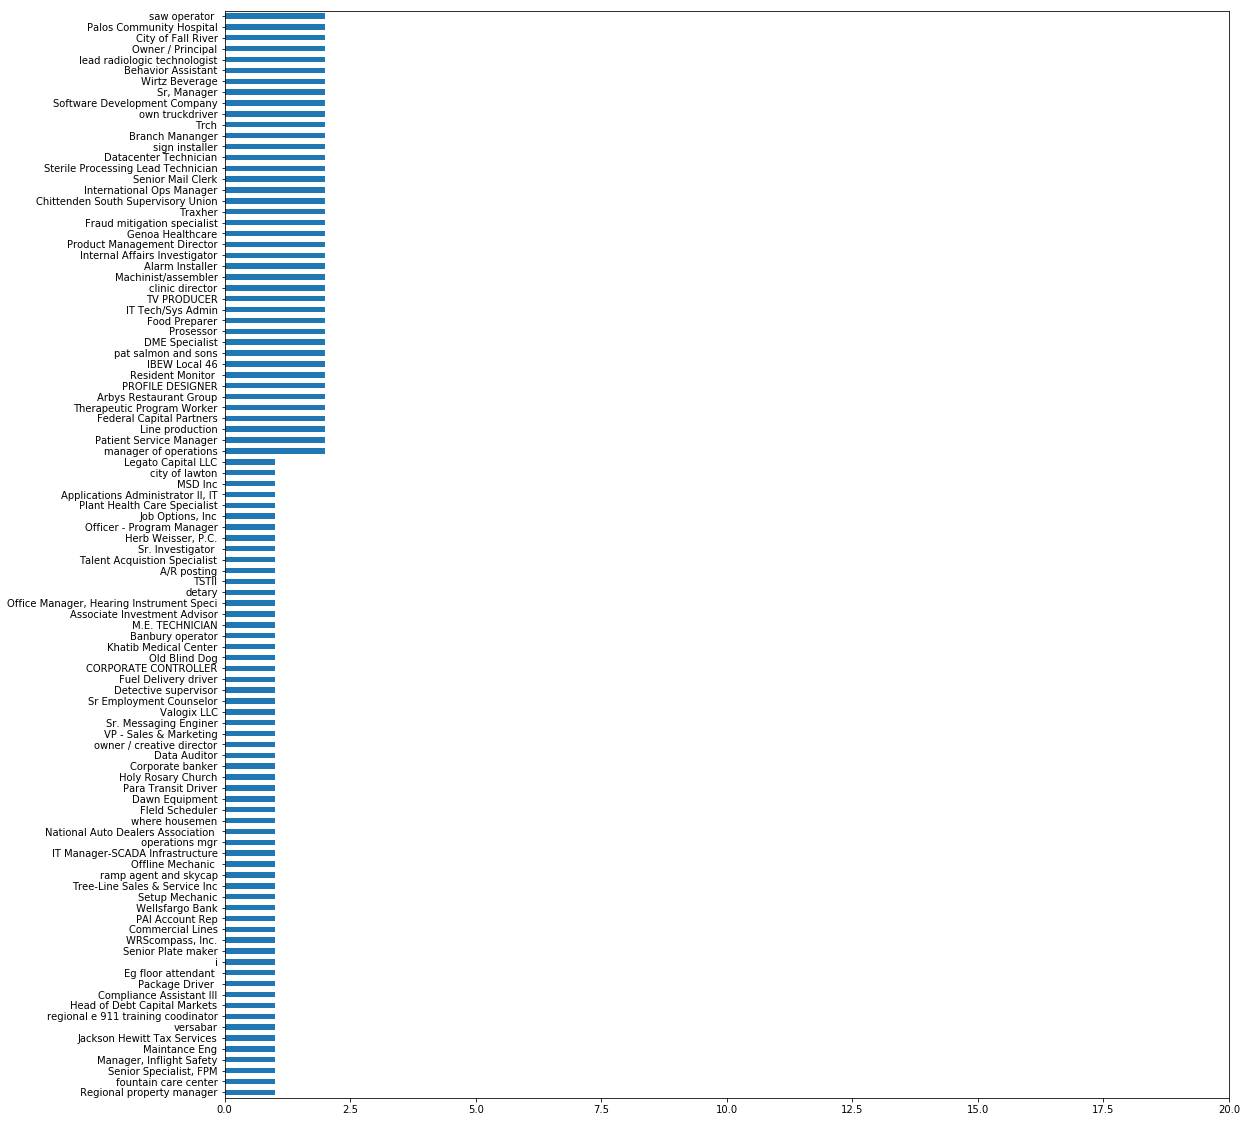

In [17]:
df['emp_title'].value_counts()[81500:81600].plot(kind='barh',figsize=(18,20))
plt.xlim(0,20)
plt.gca().invert_yaxis()

# Split the dataset into X and y datasets

In [18]:
df_X = df['loan_status']
df_X.head(20)

0      Fully Paid
1     Charged Off
2      Fully Paid
3      Fully Paid
4      Fully Paid
5      Fully Paid
6      Fully Paid
7      Fully Paid
8     Charged Off
9     Charged Off
10     Fully Paid
11     Fully Paid
12    Charged Off
13     Fully Paid
14    Charged Off
15     Fully Paid
16     Fully Paid
17     Fully Paid
18     Fully Paid
19     Fully Paid
Name: loan_status, dtype: object

In [19]:
df_X.unique()

array(['Fully Paid', 'Charged Off', 'Default'], dtype=object)

### Is this the right way to do this?  I get this weird non-specific error, but it seems to work

In [20]:
df_X.loc[df_X=='Default'] = 'Charged Off'

C:\Users\Scott\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
df_X.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [22]:
df_X.head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4     Fully Paid
Name: loan_status, dtype: object

### Let's create the y dataset

In [23]:
df_y_with_dummies = pd.get_dummies(df_y, prefix_sep='_', drop_first=True,sparse=True)

In [24]:
df_y_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422722 entries, 0 to 1422721
Columns: 456855 entries, loan_amnt to sec_app_earliest_cr_line_Sep-2017
dtypes: Sparse[uint8, 0](456764), bool(1), datetime64[ns](3), float64(87)
memory usage: 1.0 GB


### OMG, 86% of the columns are there just for the Emp Title field.  It just feels so wrong.  

In [25]:
391969/456855

0.8579724420220858

In [26]:
pca = PCA()
y_pca = pca.fit_transform(df_y_with_dummies)

MemoryError: 

In [27]:
inc_pca = IncrementalPCA(n_components=100,copy=False,batch_size=10)
# y_pca = inc_pca.fit_transform(df_y_with_dummies)
inc_pca.fit(df_y_with_dummies)
y_pca = inc_pca.transform(df_y_with_dummies)

MemoryError: 

In [28]:
tsvd = TruncatedSVD()
y_tsvd = tsvd.fit_transform(df_y_with_dummies)

MemoryError: 

In [29]:
df_simple_y = df_y.drop(['emp_title'], axis=1)
sorted(df_simple_y)

['acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'dti',
 'dti_joint',
 'earliest_cr_line',
 'emp_length_years',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'il_util',
 'initial_list_status',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'installment',
 'int_rate_pct',
 'issue_d',
 'last_credit_pull_d',
 'loan_amnt',
 'max_bal_bc',
 'meets_credit_policy',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'nu

In [30]:
df_simple_y_dummies = pd.get_dummies(df_simple_y, prefix_sep='_', drop_first=True,sparse=True)

In [31]:
df_simple_y_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422722 entries, 0 to 1422721
Columns: 64887 entries, loan_amnt to sec_app_earliest_cr_line_Sep-2017
dtypes: Sparse[uint8, 0](64796), bool(1), datetime64[ns](3), float64(87)
memory usage: 1.0 GB


In [ ]:
inc_pca = IncrementalPCA(n_components=100,copy=False,batch_size=10)
# y_pca = inc_pca.fit_transform(df_y_with_dummies)
inc_pca.fit(df_simple_y_dummies)
y_pca = inc_pca.transform(df_simple_y_dummies)

In [ ]:
tsvd = TruncatedSVD()
y_tsvd = tsvd.fit_transform(df_simple_y_dummies)